In [48]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000
sb.set()
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/train_V2.csv")

In [3]:
df['matchType'] = df['matchType'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df['matchType'].head()

0    15
1    15
2     2
3    15
4    13
Name: matchType, dtype: int8

In [4]:
df = df.dropna(how='any',axis=0)
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [42]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [32]:
df[['numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']].corr().abs()

,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
numGroups,1.000000,0.046996,0.159173,0.049880,0.010435,0.007922,0.038429,0.019173,0.082667,0.039984,0.027483,0.039621
rankPoints,0.046996,1.000000,0.000613,0.036813,0.006138,0.004724,0.039626,0.013400,0.015790,0.014756,0.993845,0.013523
revives,0.159173,0.000613,1.000000,0.109946,0.005920,0.020338,0.032989,0.038019,0.236796,0.167281,0.002434,0.240881
rideDistance,0.049880,0.036813,0.109946,1.000000,0.103518,0.049448,0.050179,0.119253,0.310936,0.282246,0.027809,0.342915
roadKills,0.010435,0.006138,0.005920,0.103518,1.000000,0.004411,0.009684,0.031071,0.016736,0.016494,0.004750,0.034544
swimDistance,0.007922,0.004724,0.020338,0.049448,0.004411,1.000000,0.006199,0.008090,0.167509,0.075698,0.002680,0.149607
teamKills,0.038429,0.039626,0.032989,0.050179,0.009684,0.006199,1.000000,0.112164,0.024858,0.035918,0.040943,0.015943
vehicleDestroys,0.019173,0.013400,0.038019,0.119253,0.031071,0.008090,0.112164,1.000000,0.076237,0.061012,0.011426,0.073436
walkDistance,0.082667,0.015790,0.236796,0.310936,0.016736,0.167509,0.024858,0.076237,1.000000,0.541222,0.002044,0.810888
weaponsAcquired,0.039984,0.014756,0.167281,0.282246,0.016494,0.075698,0.035918,0.061012,0.541222,1.000000,0.003815,0.583806


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import utils

columns = ['boosts', 'damageDealt', 'heals', 'killPlace', 'kills',
           'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rideDistance', 'walkDistance',
       'weaponsAcquired']

y = df["winPlacePerc"]
X = df[columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [64]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, max_features='sqrt')
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

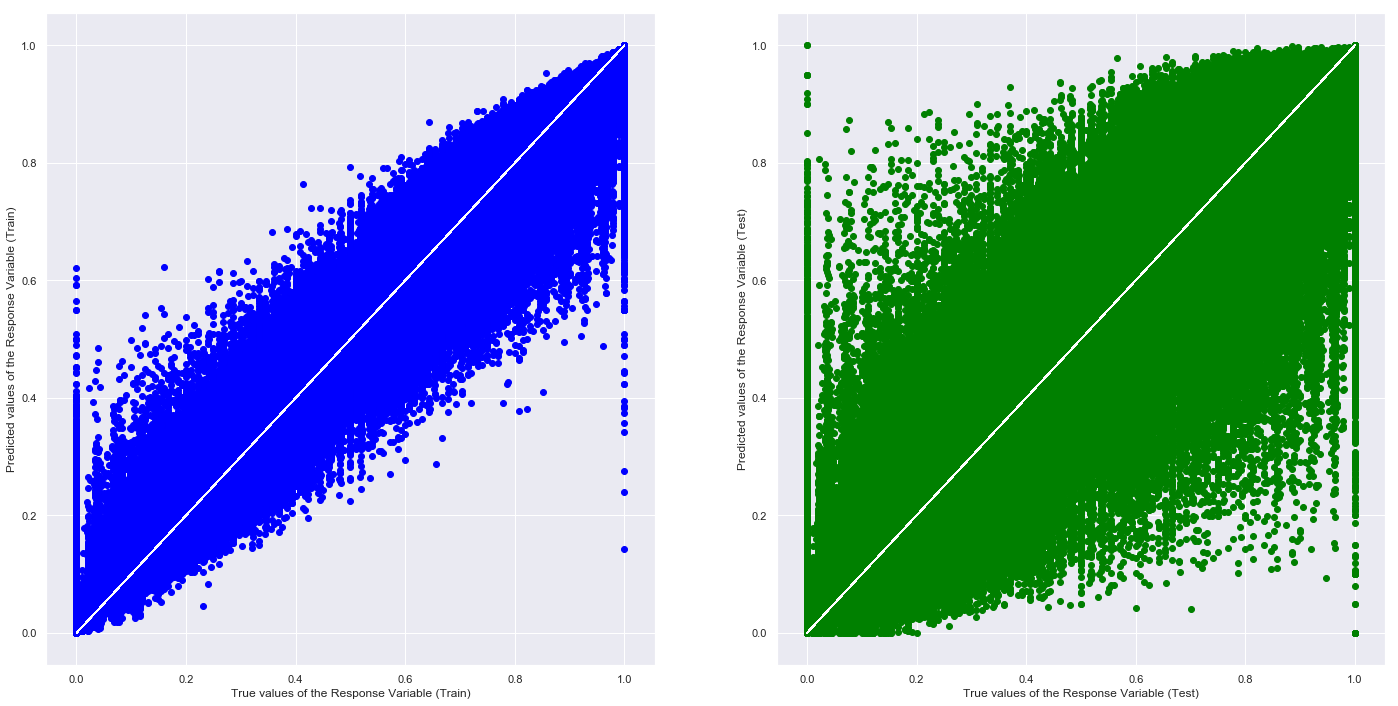

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.98739119751
Mean Squared Error (MSE) 	: 0.00119197448667

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.921206765042
Mean Squared Error (MSE) 	: 0.00743324488474



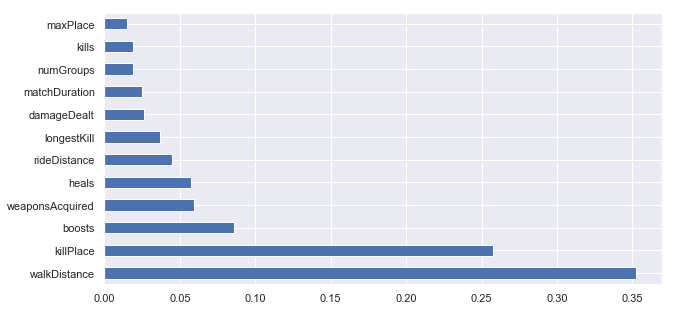

In [65]:
y_train_pred = m.predict(X_train)
y_test_pred = m.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", m.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", m.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
    
feat_importances = pd.Series(m.feature_importances_, index=columns)

f, axes = plt.subplots(1, 1, figsize=(10, 5))
feat_importances.nlargest(20).plot(kind='barh')

In [67]:
df_test_orig = pd.read_csv("Datasets/test_V2.csv")

df_test = df_test_orig[columns]

df_pred_test = m.predict(df_test)

df_test_orig['winPlacePerc'] = df_pred_test
df_test_orig = df_test_orig[['Id', 'winPlacePerc']]

df_test_orig.head()

,Id,winPlacePerc
0,9329eb41e215eb,0.235545
1,639bd0dcd7bda8,0.890950
2,63d5c8ef8dfe91,0.733790
3,cf5b81422591d1,0.550320
4,ee6a295187ba21,0.920545


In [68]:
df_test_orig.to_csv('Datasets/submission_forest_classification.csv', index = False)